# <font color="darkblue"> Prática 02: Tendência e Sazonaidade - Índice de Produção Industrial </font>

**Objetivos:**


*   Extair a tedência e a sazonalidade da série temporal do IPI brasileiro
*   Testar o conceito da regressão linear para a obtenção tendência e sazonalidae

**Requisitos de execução:**


*   Upload do arquivo *read_series.py*
*   Criar o diretório *data* e upload do arquivo *IPI.xls* neste diretório

**Atividade 1:**

Leia a série temporal do Índice de Produção Industrial (IPI) brasileiro no arquivo *IPI.xls* e plote seus valores em um gráfico de dispersão.









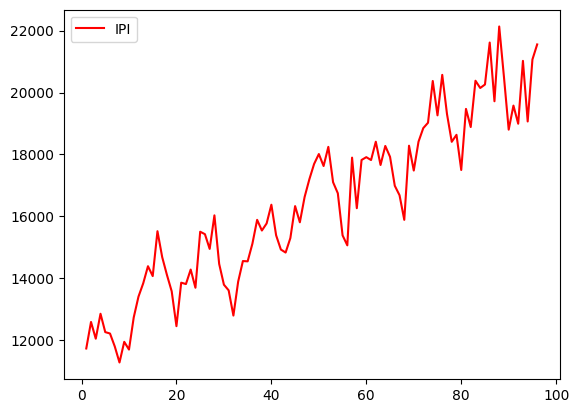

In [1]:
from read_series import ReadSeries
from matplotlib import pyplot as plt


data = []
time = []

rs = ReadSeries()
rs.read_IPI_xls(data, time)

plt.plot(time, data, 'r-')
plt.legend(['IPI'], loc=2)

**Atividade 2:**

Extrai as componenetes tendência e sazonalidade da serie temporal do IPI brasileiro, plotando estas componenetes no gráfico de dispersão. Utilize a função *seasonal_decompose* do pacote statsmodels.tsa.seasonal.

**from statsmodels.tsa.seasonal import seasonal_decompose**



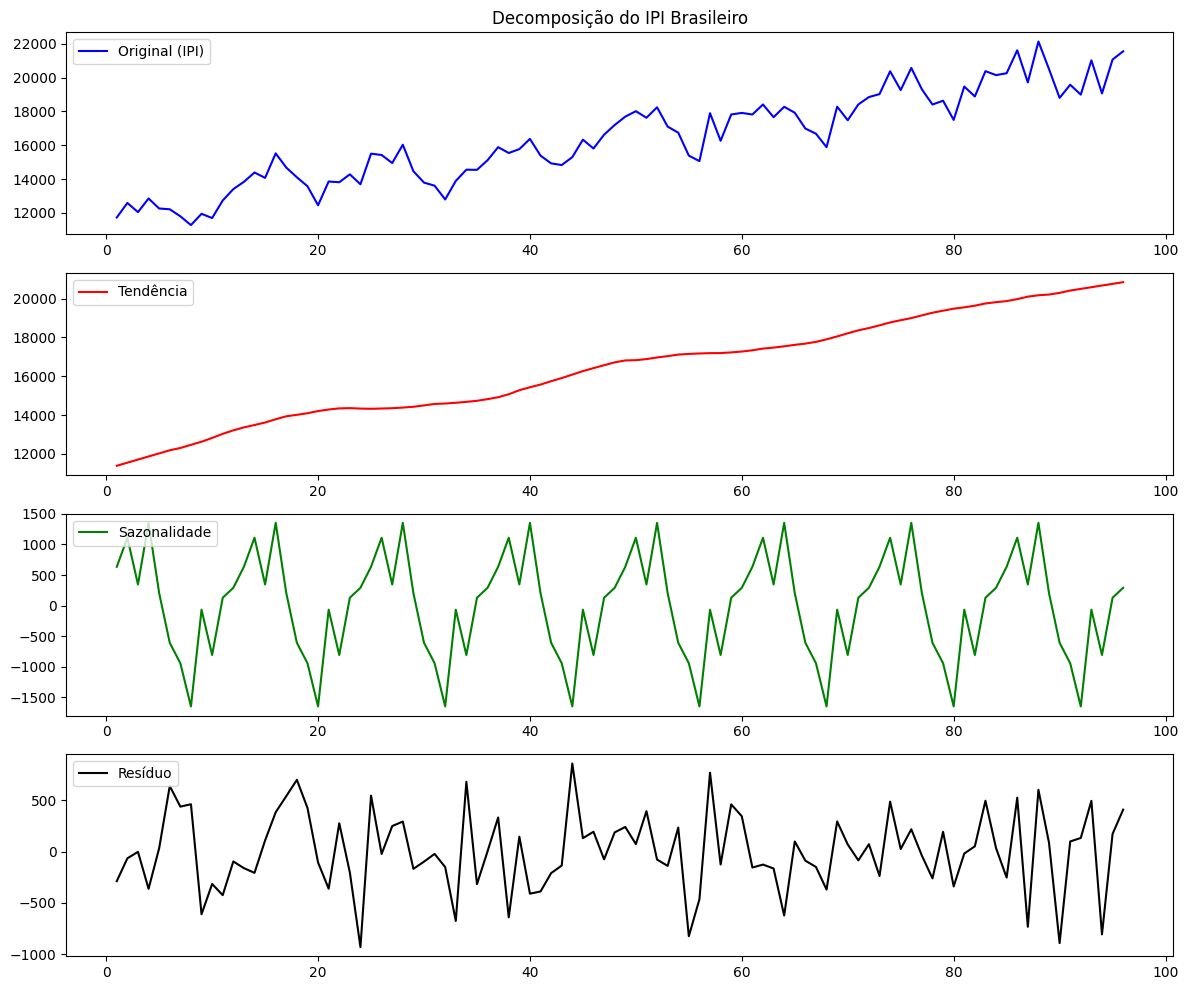

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import numpy as np

data_array = np.array(data)
resultado = seasonal_decompose(data_array, model='additive', period=12, extrapolate_trend='freq')

plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.plot(time, data, label='Original (IPI)', color='blue')
plt.legend(loc='upper left')
plt.title('Decomposição do IPI Brasileiro')

plt.subplot(4, 1, 2)
plt.plot(time, resultado.trend, label='Tendência', color='red')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(time, resultado.seasonal, label='Sazonalidade', color='green')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(time, resultado.resid, label='Resíduo', color='black')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()